In [1]:
import json
import pandas as pd

In [2]:
scores = pd.read_csv("results/co2_config_scores.csv")

In [3]:
best_mm = (
    scores.sort_values(
        ["market", "model", "MAPE", "RMSE_over_mean_price","R2"],
        ascending=[True, True, True, True, False],
    )
    .groupby(["market", "model"], as_index=False)
    .head(1)
    .reset_index(drop=True)
)

In [4]:
rank_models_in_market = (
    best_mm.sort_values(
        ["market", "MAPE", "RMSE", "R2"],
        ascending=[True, True, True, False],
    )
    .groupby("market", as_index=False)
    .head(50)  # adjust as you like
    .reset_index(drop=True)
)

In [5]:
display(best_mm)

,market,model,config_index,n_windows,MAPE,RMSE_over_mean_price,MAE,R2,RMSE,mean_price,n_samples,hyperparams_json
0,Australia,gru,111,78,0.005872,0.012410,0.177334,0.935755,0.391751,31.566257,78,"{""activation"": ""relu"", ""batch_size"": 16, ""epoc..."
1,Australia,lstm,219,78,0.005702,0.012531,0.172220,0.934501,0.395557,31.566257,78,"{""activation"": ""relu"", ""batch_size"": 16, ""epoc..."
2,Australia,mlp,150,78,0.005985,0.011794,0.181802,0.941978,0.372295,31.566257,78,"{""activation"": ""tanh"", ""batch_size"": 16, ""epoc..."
3,Australia,naive_last_price,-1,78,0.003643,0.009045,0.111538,0.965875,0.285513,31.566257,78,{}
4,Australia,rnn,114,78,0.006142,0.011965,0.186774,0.940282,0.377696,31.566257,78,"{""activation"": ""relu"", ""batch_size"": 16, ""epoc..."
5,Australia,tcn,98,78,0.006442,0.011597,0.196452,0.943901,0.366074,31.566257,78,"{""activation"": ""tanh"", ""batch_size"": 64, ""bloc..."
6,California,gru,138,78,0.009288,0.012097,0.158756,0.815503,0.207484,17.151731,78,"{""activation"": ""relu"", ""batch_size"": 16, ""epoc..."
7,California,lstm,0,78,0.009820,0.012841,0.168140,0.792117,0.220242,17.151731,78,"{""activation"": ""relu"", ""batch_size"": 16, ""epoc..."
8,California,mlp,150,78,0.010314,0.013174,0.175887,0.781185,0.225959,17.151731,78,"{""activation"": ""tanh"", ""batch_size"": 16, ""epoc..."
9,California,naive_last_price,-1,78,0.008711,0.011984,0.149263,0.818929,0.205549,17.151731,78,{}


In [6]:
display(rank_models_in_market)

,market,model,config_index,n_windows,MAPE,RMSE_over_mean_price,MAE,R2,RMSE,mean_price,n_samples,hyperparams_json
0,Australia,naive_last_price,-1,78,0.003643,0.009045,0.111538,0.965875,0.285513,31.566257,78,{}
1,Australia,lstm,219,78,0.005702,0.012531,0.172220,0.934501,0.395557,31.566257,78,"{""activation"": ""relu"", ""batch_size"": 16, ""epoc..."
2,Australia,gru,111,78,0.005872,0.012410,0.177334,0.935755,0.391751,31.566257,78,"{""activation"": ""relu"", ""batch_size"": 16, ""epoc..."
3,Australia,mlp,150,78,0.005985,0.011794,0.181802,0.941978,0.372295,31.566257,78,"{""activation"": ""tanh"", ""batch_size"": 16, ""epoc..."
4,Australia,rnn,114,78,0.006142,0.011965,0.186774,0.940282,0.377696,31.566257,78,"{""activation"": ""relu"", ""batch_size"": 16, ""epoc..."
5,Australia,tcn,98,78,0.006442,0.011597,0.196452,0.943901,0.366074,31.566257,78,"{""activation"": ""tanh"", ""batch_size"": 64, ""bloc..."
6,California,naive_last_price,-1,78,0.008711,0.011984,0.149263,0.818929,0.205549,17.151731,78,{}
7,California,gru,138,78,0.009288,0.012097,0.158756,0.815503,0.207484,17.151731,78,"{""activation"": ""relu"", ""batch_size"": 16, ""epoc..."
8,California,lstm,0,78,0.009820,0.012841,0.168140,0.792117,0.220242,17.151731,78,"{""activation"": ""relu"", ""batch_size"": 16, ""epoc..."
9,California,tcn,146,78,0.010108,0.013386,0.172415,0.774076,0.229600,17.151731,78,"{""activation"": ""tanh"", ""batch_size"": 64, ""bloc..."


In [7]:
agg = (
    scores.groupby(["model", "hyperparams_json"], as_index=False)
    .agg(
        markets_covered=("market","nunique"),
        mean_MAPE=("MAPE","mean"),
        mean_RMSE_over_mean_price=("RMSE_over_mean_price","mean"),
        mean_MAE=("MAE","mean"),
        mean_R2=("R2","mean"),
    )
)

In [8]:
best_by_model = (
    agg.sort_values(
        ["model", "markets_covered", "mean_MAPE", "mean_RMSE_over_mean_price", "mean_MAE", "mean_R2"],
        ascending=[True, False, True, True, True, False],
    )
    .groupby("model", as_index=False)
    .head(1)
    .reset_index(drop=True)
)

In [9]:
display(best_by_model)

,model,hyperparams_json,markets_covered,mean_MAPE,mean_RMSE_over_mean_price,mean_MAE,mean_R2
0,gru,"{""activation"": ""relu"", ""batch_size"": 16, ""epoc...",6,0.013044,0.018484,0.715746,0.591580
1,lstm,"{""activation"": ""relu"", ""batch_size"": 16, ""epoc...",6,0.013106,0.018958,0.711259,0.587242
2,mlp,"{""activation"": ""tanh"", ""batch_size"": 16, ""epoc...",6,0.013492,0.018625,0.741492,0.630002
3,naive_last_price,{},6,0.010325,0.015897,0.558419,0.690115
4,rnn,"{""activation"": ""relu"", ""batch_size"": 16, ""epoc...",6,0.013165,0.018233,0.721239,0.642016
5,tcn,"{""activation"": ""tanh"", ""batch_size"": 64, ""bloc...",6,0.013688,0.019056,0.751268,0.592463


In [10]:
with open("results/co2_best_configs.json","r") as f:
    best_cfgs = json.load(f)

best_cfgs["Australia"]["mlp"]  # example lookup

{'MAE': 0.18180221984560851,
 'MAPE': 0.005984513176724199,
 'R2': 0.9419781891462186,
 'RMSE': 0.372294935101545,
 'RMSE_over_mean_price': 0.01179407907394478,
 'config_index': 150,
 'hyperparams': {'activation': 'tanh',
  'batch_size': 16,
  'epochs': 16,
  'hidden_units': 64,
  'learning_rate': 0.001,
  'num_layers': 4},
 'hyperparams_json': '{"activation": "tanh", "batch_size": 16, "epochs": 16, "hidden_units": 64, "learning_rate": 0.001, "num_layers": 4}',
 'market': 'Australia',
 'mean_price': 31.56625733704048,
 'model': 'mlp',
 'n_samples': 78,
 'n_windows': 78}

In [11]:
# %% [A1] Load results
from pathlib import Path
import numpy as np
import pandas as pd

ROOT = Path(".")  # run from repo root
METRICS_PATH = ROOT / "results" / "co2_test_metrics.csv"

df = pd.read_csv(METRICS_PATH)

# If you want the exact ordering you mentioned:
# MAPE, RMSE/mean(price), MAE, R2
ORDER_COLS = ["MAPE", "RMSE", "R2"]

# sort direction: MAPE asc, RMSE/mean(price) asc, MAE asc, R2 desc
df_sorted = df.sort_values(
    ["market", "model", "MAPE", "RMSE", "R2"],
    ascending=[True, True, True, True, False],
).reset_index(drop=True)

display(df_sorted)


,market,model,config_index,window_size,test_ratio,n_windows,train_loss_last_mean,MAPE,RMSE_over_mean_price,MAE,...,batch_size,epochs,hidden_units,learning_rate,num_layers,skipped,reason,blocks,channels,kernel_size
0,Australia,gru,111,10,0.1,750,2.685216e-01,0.010642,0.015773,0.365954,...,16.0,16.0,64.0,0.003,3.0,False,NaN,NaN,NaN,NaN
1,Australia,lstm,219,10,0.1,750,3.429610e-01,0.010744,0.016031,0.369976,...,16.0,16.0,128.0,0.003,4.0,False,NaN,NaN,NaN,NaN
2,Australia,mlp,150,10,0.1,750,2.704307e-01,0.010914,0.016351,0.376209,...,16.0,16.0,64.0,0.001,4.0,False,NaN,NaN,NaN,NaN
3,Australia,naive_last_price,-1,10,0.1,750,NaN,0.007333,0.012693,0.251827,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
4,Australia,rnn,114,10,0.1,750,3.160532e-01,0.010492,0.015816,0.362053,...,16.0,16.0,64.0,0.001,3.0,False,NaN,NaN,NaN,NaN
5,Australia,tcn,98,10,0.1,750,2.313908e-01,0.010648,0.015782,0.367438,...,64.0,16.0,NaN,0.001,NaN,False,NaN,2.0,64.0,5.0
6,California,gru,138,10,0.1,750,2.632692e-01,0.010446,0.014983,0.199229,...,16.0,16.0,64.0,0.003,4.0,False,NaN,NaN,NaN,NaN
7,California,lstm,0,10,0.1,750,2.031550e-01,0.010543,0.015536,0.200945,...,16.0,16.0,32.0,0.010,2.0,False,NaN,NaN,NaN,NaN
8,California,mlp,150,10,0.1,750,2.512097e-01,0.010829,0.015662,0.206239,...,16.0,16.0,64.0,0.001,4.0,False,NaN,NaN,NaN,NaN
9,California,naive_last_price,-1,10,0.1,750,NaN,0.008128,0.012565,0.155547,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN


In [12]:
# %% [A2] Rank models within each market (best to worst)
rank_in_market = df.sort_values(
    ["market", "MAPE", "RMSE", "R2"],
    ascending=[True, True, True, False],
).copy()

rank_in_market["rank_in_market"] = rank_in_market.groupby("market").cumcount() + 1

cols = ["market", "rank_in_market", "model", "MAPE", "RMSE", "R2", "n_windows"]
display(rank_in_market[cols])


,market,rank_in_market,model,MAPE,RMSE,R2,n_windows
3,Australia,1,naive_last_price,0.007333,0.443548,0.972405,750
4,Australia,2,rnn,0.010492,0.552685,0.957155,750
0,Australia,3,gru,0.010642,0.551153,0.957392,750
5,Australia,4,tcn,0.010648,0.551484,0.957341,750
1,Australia,5,lstm,0.010744,0.560195,0.955982,750
2,Australia,6,mlp,0.010914,0.571360,0.954210,750
9,California,1,naive_last_price,0.008128,0.242133,0.991946,750
6,California,2,gru,0.010446,0.288736,0.988548,750
7,California,3,lstm,0.010543,0.299374,0.987689,750
11,California,4,tcn,0.010652,0.307410,0.987019,750


In [13]:
# %% [A3] Model-level averages across markets (who is best overall)
model_avg = (
    df.groupby("model", as_index=False)
      .agg(
          markets_covered=("market", "nunique"),
          mean_MAPE=("MAPE", "mean"),
          mean_RMSE_over_mean_price=("RMSE", "mean"),
          mean_R2=("R2", "mean"),
      )
      .sort_values(["mean_MAPE", "mean_RMSE_over_mean_price", "mean_R2"],
                   ascending=[True, True, False])
      .reset_index(drop=True)
)

display(model_avg)


,model,markets_covered,mean_MAPE,mean_RMSE_over_mean_price,mean_R2
0,naive_last_price,6,0.010904,0.901612,0.974871
1,gru,6,0.014606,1.146517,0.959689
2,rnn,6,0.014635,1.153016,0.959262
3,lstm,6,0.014823,1.171883,0.958200
4,mlp,6,0.015805,1.343846,0.945244
5,tcn,6,0.017551,3.760468,0.092920


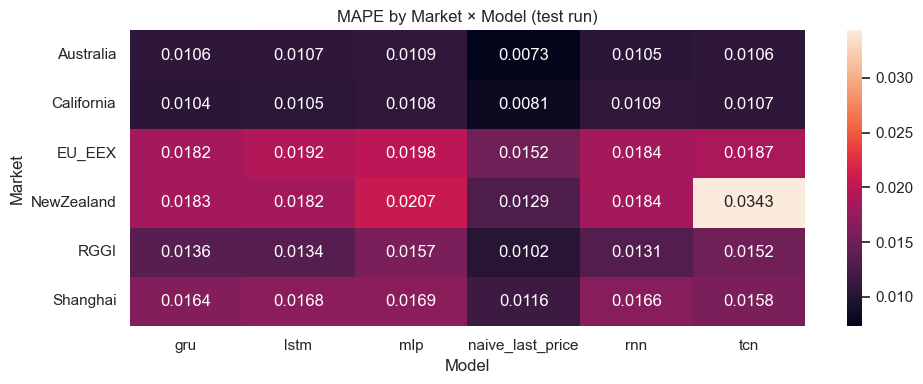

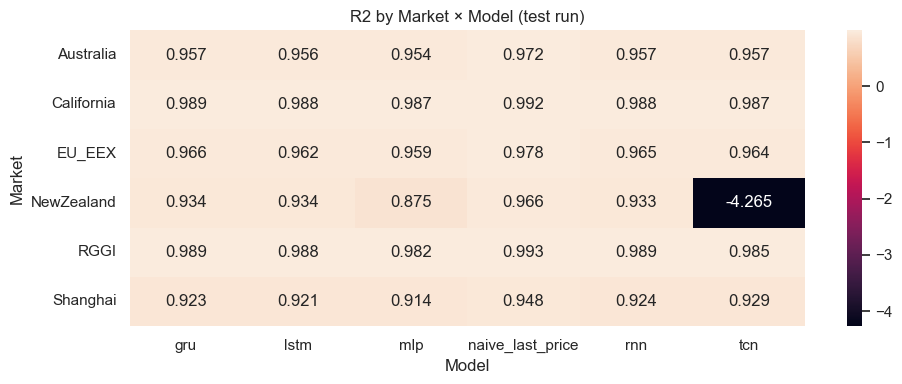

In [14]:
# %% [B1] Heatmaps
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")  # no grid background

def heatmap_metric(metric: str, fmt: str = ".4f"):
    pivot = df.pivot(index="market", columns="model", values=metric)
    plt.figure(figsize=(10, 4))
    ax = sns.heatmap(pivot, annot=True, fmt=fmt)
    ax.set_title(f"{metric} by Market × Model (test run)")
    ax.set_xlabel("Model")
    ax.set_ylabel("Market")
    plt.tight_layout()
    plt.show()

heatmap_metric("MAPE", fmt=".4f")
heatmap_metric("R2", fmt=".3f")


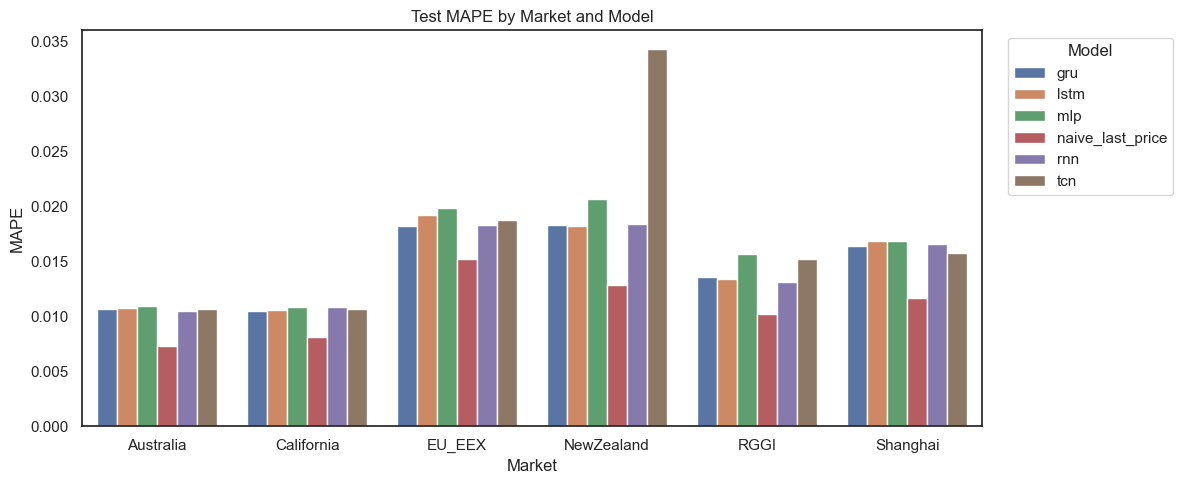

In [15]:
# %% [B2] Barplot: per-market model comparison (MAPE)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

plt.figure(figsize=(12, 5))
ax = sns.barplot(data=df, x="market", y="MAPE", hue="model")
ax.set_title("Test MAPE by Market and Model")
ax.set_xlabel("Market")
ax.set_ylabel("MAPE")
plt.legend(title="Model", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [16]:
# %% [C1] Helpers to load per-window traces from test_log
from pathlib import Path
import ast
import json
import numpy as np
import pandas as pd

TEST_LOG_DIR = ROOT / "test_log" / "co2"

def safe_parse_list(x):
    if isinstance(x, list):
        return [float(v) for v in x]
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return []
    s = str(x).strip()
    if not s:
        return []
    try:
        obj = json.loads(s)
        if isinstance(obj, list):
            return [float(v) for v in obj]
    except Exception:
        pass
    try:
        obj = ast.literal_eval(s)
        if isinstance(obj, list):
            return [float(v) for v in obj]
    except Exception:
        pass
    return []

def load_trace(market: str, model: str):
    mtag = model.upper()
    path = TEST_LOG_DIR / mtag / market / f"{mtag}_{market}.csv"
    if not path.exists():
        raise FileNotFoundError(path)

    d = pd.read_csv(path).sort_values("window_id").reset_index(drop=True)

    y_true = np.array([safe_parse_list(v)[0] for v in d["test_data_values_list"]], dtype=float)
    y_pred = np.array([safe_parse_list(v)[0] for v in d["test_data_model_predictions_list"]], dtype=float)

    # This is the end date of the feature window (t). The target is t+1,
    # but logs don’t store target date; approximate with next business day.
    end_dates = pd.to_datetime(d["end_date"], errors="coerce")
    x_dates = end_dates + pd.offsets.BDay(1)

    return x_dates, y_true, y_pred


In [17]:
# %% [C1.1] Load trace as a Date-indexed DataFrame, then align across models
from pathlib import Path
import ast, json
import numpy as np
import pandas as pd

ROOT = Path(".")
TEST_LOG_DIR = ROOT / "test_log" / "co2"   # <-- make sure this matches your folder name

def safe_parse_list(x):
    if isinstance(x, list):
        return [float(v) for v in x]
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return []
    s = str(x).strip()
    if not s:
        return []
    try:
        obj = json.loads(s)
        if isinstance(obj, list):
            return [float(v) for v in obj]
    except Exception:
        pass
    try:
        obj = ast.literal_eval(s)
        if isinstance(obj, list):
            return [float(v) for v in obj]
    except Exception:
        pass
    return []

def load_trace_df(market: str, model: str) -> pd.DataFrame:
    mtag = model.upper()
    path = TEST_LOG_DIR / mtag / market / f"{mtag}_{market}.csv"
    if not path.exists():
        raise FileNotFoundError(path)

    d = pd.read_csv(path).sort_values("window_id").reset_index(drop=True)

    end_dates = pd.to_datetime(d["end_date"], errors="coerce")
    target_dates = end_dates + pd.offsets.BDay(1)

    y_true = np.array([safe_parse_list(v)[0] for v in d["test_data_values_list"]], dtype=float)
    y_pred = np.array([safe_parse_list(v)[0] for v in d["test_data_model_predictions_list"]], dtype=float)

    out = pd.DataFrame(
        {
            "target_date": target_dates,
            "y_true": y_true,
            "y_pred": y_pred,
            "window_id": d["window_id"].values,
        }
    )

    # Clean
    out = out.dropna(subset=["target_date"])
    out = out.sort_values(["target_date", "window_id"], kind="stable")

    # ---- KEY FIX: enforce unique target_date index ----
    # If duplicates exist, keep the last one (newest window_id)
    out = out.drop_duplicates(subset=["target_date"], keep="last")

    out = out.set_index("target_date")[["y_true", "y_pred"]]
    out.index.name = "target_date"
    return out

def load_aligned_panel(market: str, models: list[str], how: str = "inner") -> pd.DataFrame:
    base = load_trace_df(market, "naive_last_price")[["y_true"]]

    preds = []
    for m in models:
        dfm = load_trace_df(market, m)[["y_pred"]].rename(columns={"y_pred": m})
        preds.append(dfm)

    all_df = pd.concat([base] + preds, axis=1, join=how).sort_index()
    return all_df


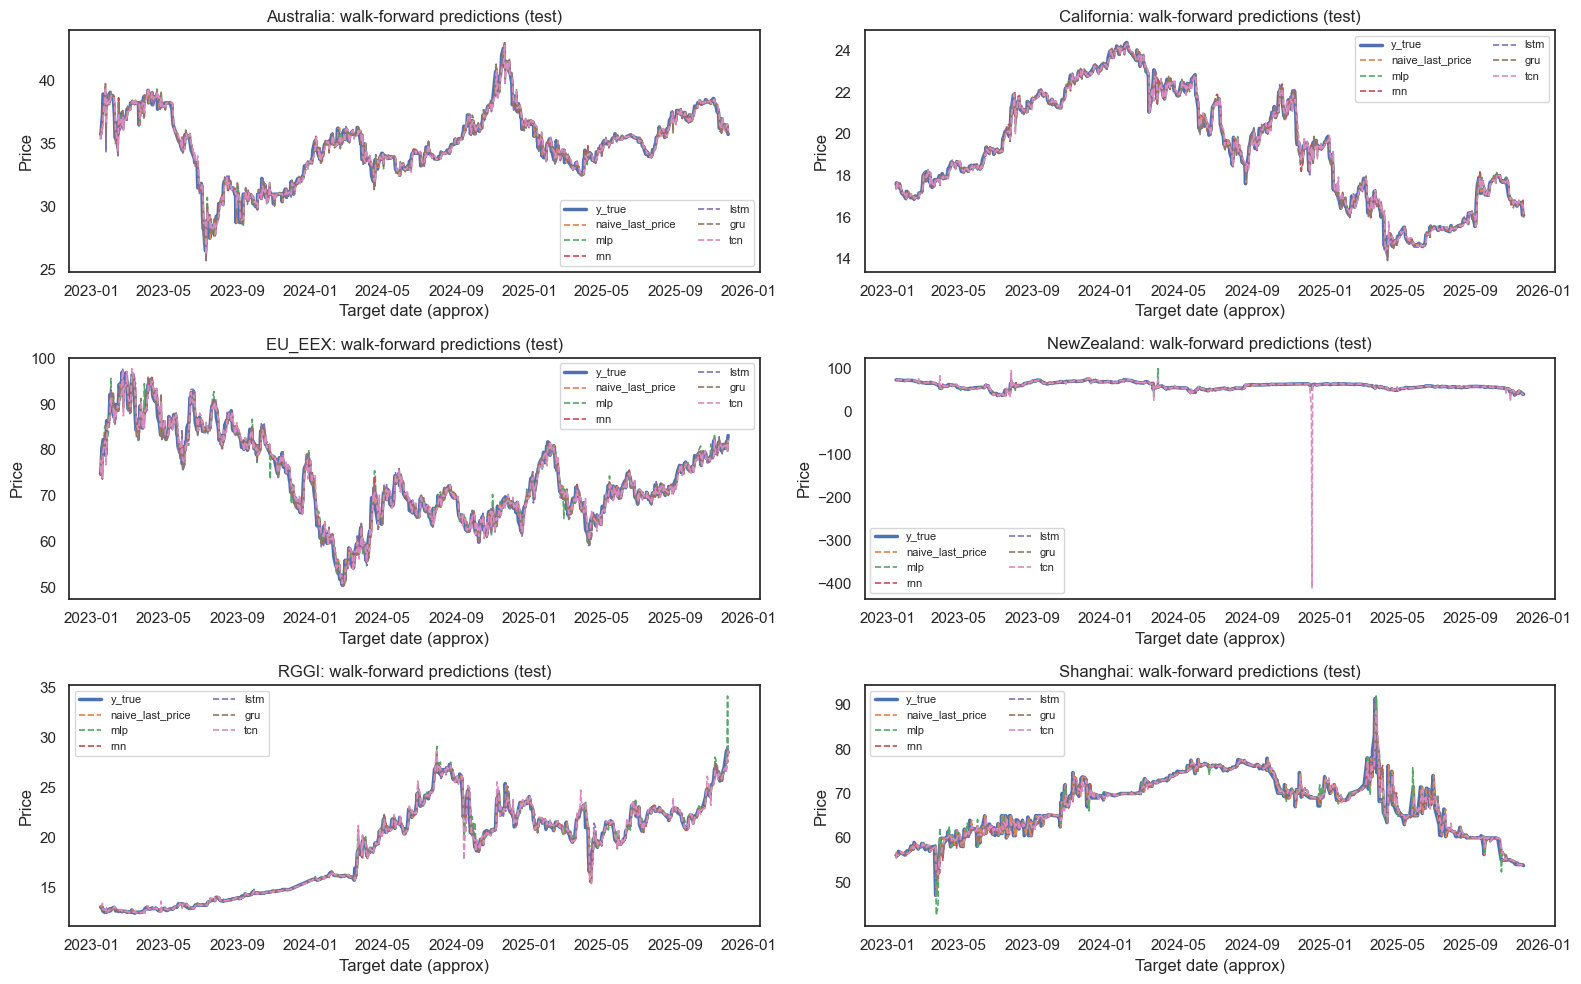

In [18]:
# %% [C2] Plot truth vs predictions for each market (3×2)
import matplotlib.pyplot as plt

MARKETS = ["Australia", "California", "EU_EEX", "NewZealand", "RGGI", "Shanghai"]
MODELS  = ["naive_last_price", "mlp", "rnn", "lstm", "gru", "tcn"]

fig, axes = plt.subplots(3, 2, figsize=(16, 10), sharex=False)
axes = axes.ravel()

for ax, market in zip(axes, MARKETS):
    # plot truth once (use any model file to get y_true; we’ll use naive)
    x_dates, y_true, _ = load_trace(market, "naive_last_price")
    ax.plot(x_dates, y_true, linewidth=2.5, label="y_true")  # solid

    # overlay each model prediction (dashed + thinner)
    for model in MODELS:
        x, _, y_pred = load_trace(market, model)
        ax.plot(x, y_pred, linestyle="--", linewidth=1.2, label=model)

    ax.set_title(f"{market}: walk-forward predictions (test)")
    ax.set_xlabel("Target date (approx)")
    ax.set_ylabel("Price")
    ax.grid(False)
    # one legend per subplot can be huge; comment out if too busy:
    ax.legend(fontsize=8, ncol=2)

plt.tight_layout()
plt.show()

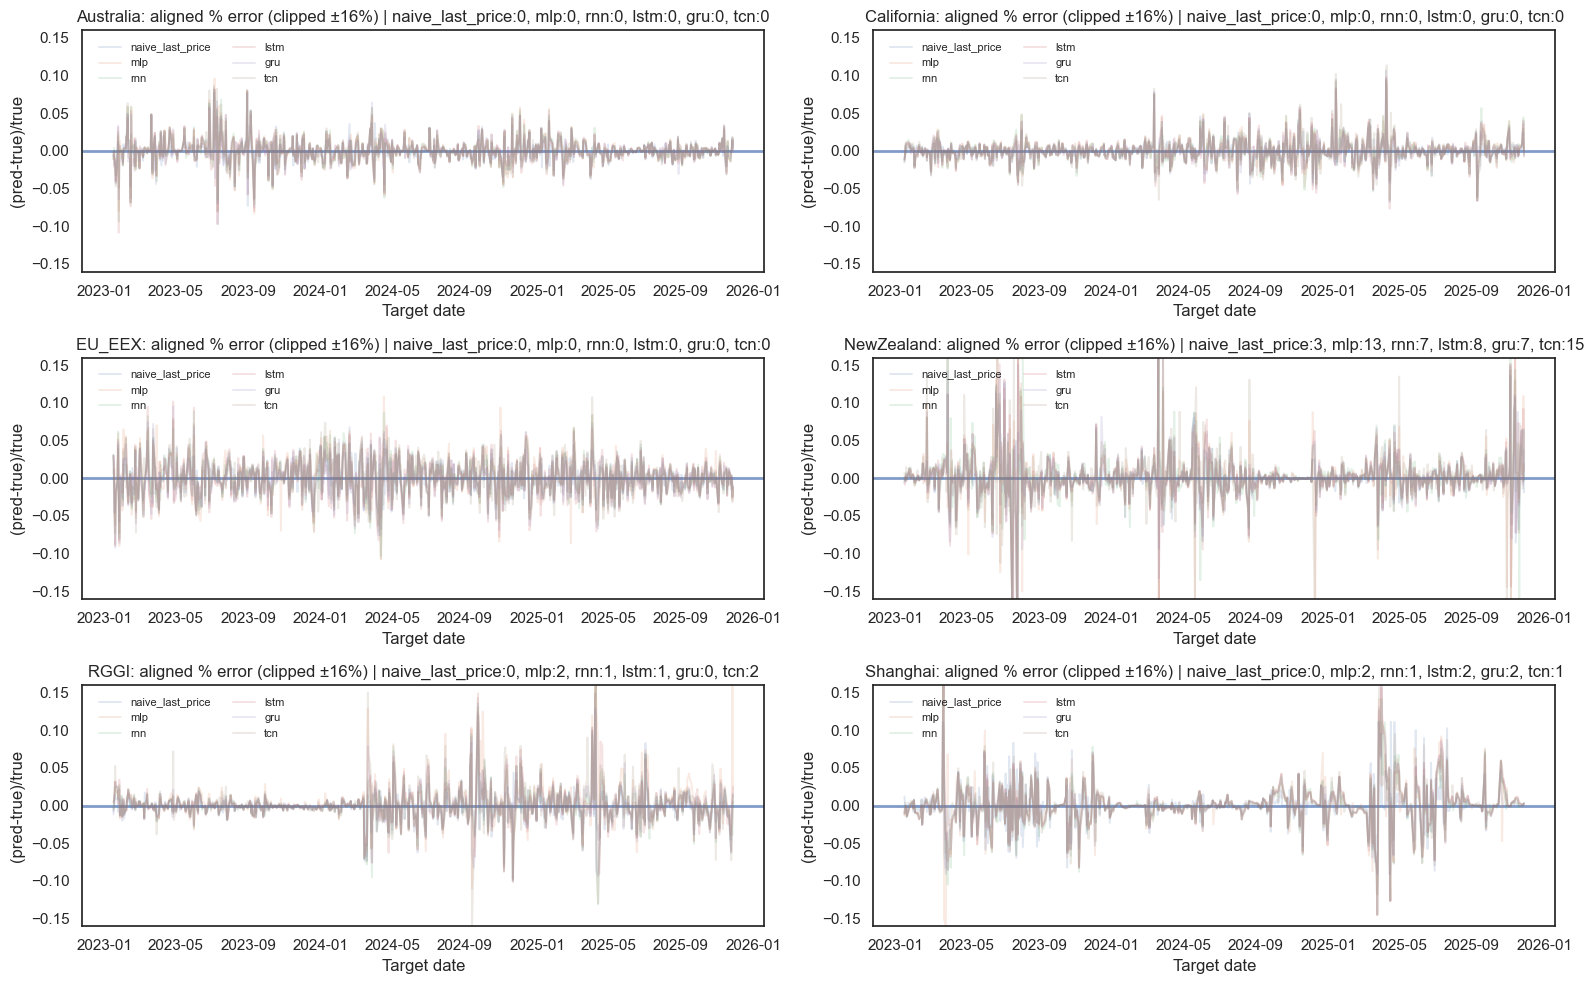

In [24]:
# %% [C3] Aligned % error plot (solid, very transparent, clipped to ±5%)
import matplotlib.pyplot as plt
import numpy as np

MARKETS = ["Australia", "California", "EU_EEX", "NewZealand", "RGGI", "Shanghai"]
MODELS  = ["naive_last_price", "mlp", "rnn", "lstm", "gru", "tcn"]

Y_LIM = 0.16
ALPHA_MODEL = 0.16
LW_MODEL = 1.4

fig, axes = plt.subplots(3, 2, figsize=(16, 10), sharex=False)
axes = axes.ravel()

for ax, market in zip(axes, MARKETS):
    panel = load_aligned_panel(market, MODELS, how="inner")  # <- key fix

    yt = panel["y_true"].astype(float)
    eps = 1e-12
    denom = np.maximum(np.abs(yt.values), eps)

    ax.axhline(0.0, linewidth=2.0, alpha=0.7)

    clipped_counts = {}
    for m in MODELS:
        yp = panel[m].astype(float).values
        pe = (yp - yt.values) / denom
        clipped_counts[m] = int(np.sum(np.abs(pe) > Y_LIM))

        pe_plot = np.clip(pe, -Y_LIM, Y_LIM)
        ax.plot(panel.index, pe_plot, linestyle="-", linewidth=LW_MODEL, alpha=ALPHA_MODEL, label=m)

    ax.set_title(
        f"{market}: aligned % error (clipped ±{int(Y_LIM*100)}%) | "
        + ", ".join([f"{m}:{clipped_counts[m]}" for m in MODELS])
    )
    ax.set_xlabel("Target date")
    ax.set_ylabel("(pred-true)/true")
    ax.set_ylim(-Y_LIM, Y_LIM)
    ax.grid(False)
    ax.legend(loc="upper left", bbox_to_anchor=(0.01, 0.99), fontsize=8, ncol=2, frameon=False)
    
plt.tight_layout()
plt.show()